In [161]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegression 
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
#loading the data set
bank = pd.read_csv("bank-full.csv" , sep=';')

In [163]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [164]:
bank.shape

(45211, 17)

In [165]:
#checking the null values
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


there are no null values

In [166]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

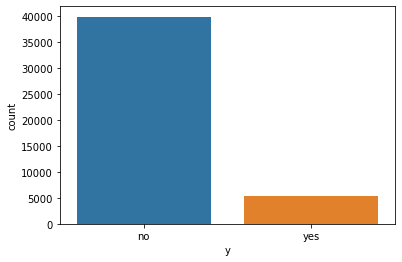

In [167]:
#checking which attribute have good impact to predict wether the clint
#has subscribed are not
sns.countplot(x='y',data=bank)

from the above countplot we got to know that so max members were not subscribed for the term 

Text(0, 0.5, 'Frequency of purchase')

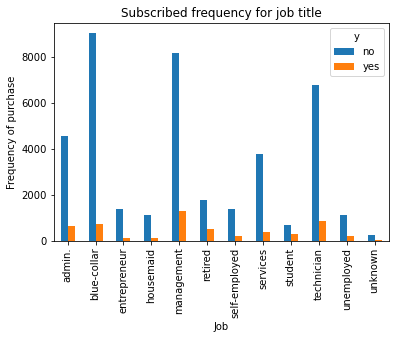

In [168]:
pd.crosstab(bank.job,bank.y).plot(kind='bar')
plt.title('Subscribed frequency for job title')
plt.xlabel('Job')
plt.ylabel('Frequency of purchase')

from the above graph all the job role have different type of subscription so it is important feature

Text(0, 0.5, 'Proportion of customers')

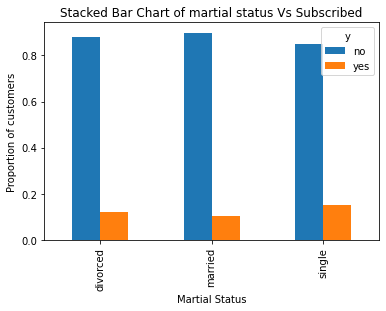

In [169]:
table=pd.crosstab(bank.marital,bank.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False)
plt.title('Stacked Bar Chart of martial status Vs Subscribed')
plt.xlabel('Martial Status')
plt.ylabel('Proportion of customers')

as we know that marital status does not effect

In [170]:
bank.drop(['month','education','pdays','day','campaign','age','loan','housing','marital'],axis=1,inplace=True)

In [171]:
#creating the dummy variable for the categorical data

In [172]:
contact_d = pd.get_dummies(bank['contact'],drop_first=True)
contact_d.columns

Index(['telephone', 'unknown'], dtype='object')

In [173]:
job_d = pd.get_dummies(bank['job'],drop_first=True)
job_d.columns

Index(['blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'unknown'],
      dtype='object')

In [174]:
poutcome_d = pd.get_dummies(bank['poutcome'],drop_first=True)
poutcome_d.columns
 

Index(['other', 'success', 'unknown'], dtype='object')

In [175]:
default_d = pd.get_dummies(bank['default'],drop_first=True)
default_d.columns

Index(['yes'], dtype='object')

In [176]:
#concate the dummy variables
bank1=pd.concat([bank,default_d,poutcome_d,job_d,contact_d],axis=1)
bank1.head()

,job,default,balance,contact,duration,previous,poutcome,y,yes,other,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,management,no,2143,unknown,261,0,unknown,no,0,0,...,1,0,0,0,0,0,0,0,0,1
1,technician,no,29,unknown,151,0,unknown,no,0,0,...,0,0,0,0,0,1,0,0,0,1
2,entrepreneur,no,2,unknown,76,0,unknown,no,0,0,...,0,0,0,0,0,0,0,0,0,1
3,blue-collar,no,1506,unknown,92,0,unknown,no,0,0,...,0,0,0,0,0,0,0,0,0,1
4,unknown,no,1,unknown,198,0,unknown,no,0,0,...,0,0,0,0,0,0,0,1,0,1


In [177]:
#drop the existing categorical columns for whom
#we have make them dummy variable

In [189]:
bank1.drop(['default','poutcome','job','contact'],axis=1,inplace=True)
bank1.head()

,balance,duration,previous,y,yes,other,success,unknown,blue-collar,entrepreneur,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,2143,261,0,no,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,29,151,0,no,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,76,0,no,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1506,92,0,no,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,198,0,no,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [190]:
bank1.columns

Index(['balance', 'duration', 'previous', 'y', 'yes', 'other', 'success',
       'unknown', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown', 'telephone', 'unknown'],
      dtype='object')

In [191]:
#map the output variable for converting categorical to numerical data and
#create new data frame
bank_new = bank1.copy()
bank_new['y'] = bank_new['y'].map({'no':0,'yes':1})
bank_new.head()

,balance,duration,previous,y,yes,other,success,unknown,blue-collar,entrepreneur,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,2143,261,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,29,151,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,76,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1506,92,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,198,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


# Creating the model

In [192]:
#assign the input abd output variables in x and y
X = bank1.drop('y',axis=1)
Y = bank1['y']

In [193]:
Y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [194]:
X

,balance,duration,previous,yes,other,success,unknown,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,2143,261,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,29,151,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,2,76,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1506,92,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
4,1,198,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,825,977,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
45207,1729,456,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
45208,5715,1127,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
45209,668,508,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0


In [195]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\Naveen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [196]:
#Prediction probability of output
y_pred = classifier.predict(X)
y_pred_prob = classifier.predict_proba(X)
y_pred_prob

array([[0.97651577, 0.02348423],
       [0.98543057, 0.01456943],
       [0.99026904, 0.00973096],
       ...,
       [0.00825233, 0.99174767],
       [0.88279077, 0.11720923],
       [0.8835009 , 0.1164991 ]])

In [197]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix=confusion_matrix(Y,y_pred)
accuracy = accuracy_score(Y,y_pred)
print(cm,accuracy)

[[39007   915]
 [ 3603  1686]] 0.9000685673840437


from the above confusion matrix we got to know that the accuracy is  90% and it is a good model 

In [198]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95     39922
         yes       0.65      0.32      0.43      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.65      0.69     45211
weighted avg       0.88      0.90      0.88     45211



# ROC Curve

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

y_predict = label_encoder.fit_transform(y_pred)

y_actual = label_encoder.fit_transform(bank_new['y'])

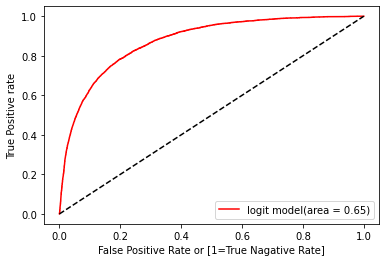

In [200]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr , tpr, thresholds = roc_curve(y_actual,classifier.predict_proba (X)[:,1])

auc = roc_auc_score(y_actual,y_predict)

import matplotlib.pyplot as plt 
plt.plot (fpr,tpr,color = 'red',label='logit model(area = %0.2f)'%auc)


plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1=True Nagative Rate]')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

plt.show()

In [202]:
#area under the curve
auc

0.6479275611264995

# Conclusion